In [1]:
from arpes.io import load_data
import os.path


C:\Users\hellbrue\Documents\Repositories\pyarpes\arpes\config.py:54: UserWarning: Could not find local configuration file. If you don't have one, you can safely ignore this message.
  warnings.warn(msg)


Activating auto-logging. Current session state plus future input saved.
Filename       : logs\unnamed_2022-12-12_14-24-20.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


# Overview of FS maps of Bi2223 1. Beamtime at PSI
This notebook covers a broad overview of all FS maps measured at the 1. beamtime at PSI. On this beamtime only one sample was of Bi2223 was measured.
Additionally to the FS maps, "zoomed" in maps were measured with higher angular resolution.

## FS maps of Bi2223

In [4]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Box_1_square_renamed")

# Different parameters used to set up scans at SLS
scan_type = 'FS'
direction = '*'
phi = '*'
energy = '*'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = ''
run = '*'.zfill(4)

# Put together string for finding file
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'FS_*_*_*_*_*_*eVpass_000*.h5'

In [5]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print(len(files))
files

21


['G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_AN_P5_25eV_CIRCP_HT_10eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_AN_P5_25eV_CIRCP_LT_5eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_AN_P95_25eV_CIRCP_HT_10eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_AN_P95_25eV_CIRCP_LT_5eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_N_M40_26p5eV_CIRCP_LT_10eVpass_0001.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_N_M40_26p5eV_CIRCP_LT_10eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_N_M42_26p5eV_LHQ_LT_5eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_N_M40_26p5eV_CIRCP_LT_10eVpass_0002.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_N_M42_26p5eV_LHQ_LT_5eVpass_0001.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_N_M43_25eV_LHQ_LT_10eVpass_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_

In [6]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

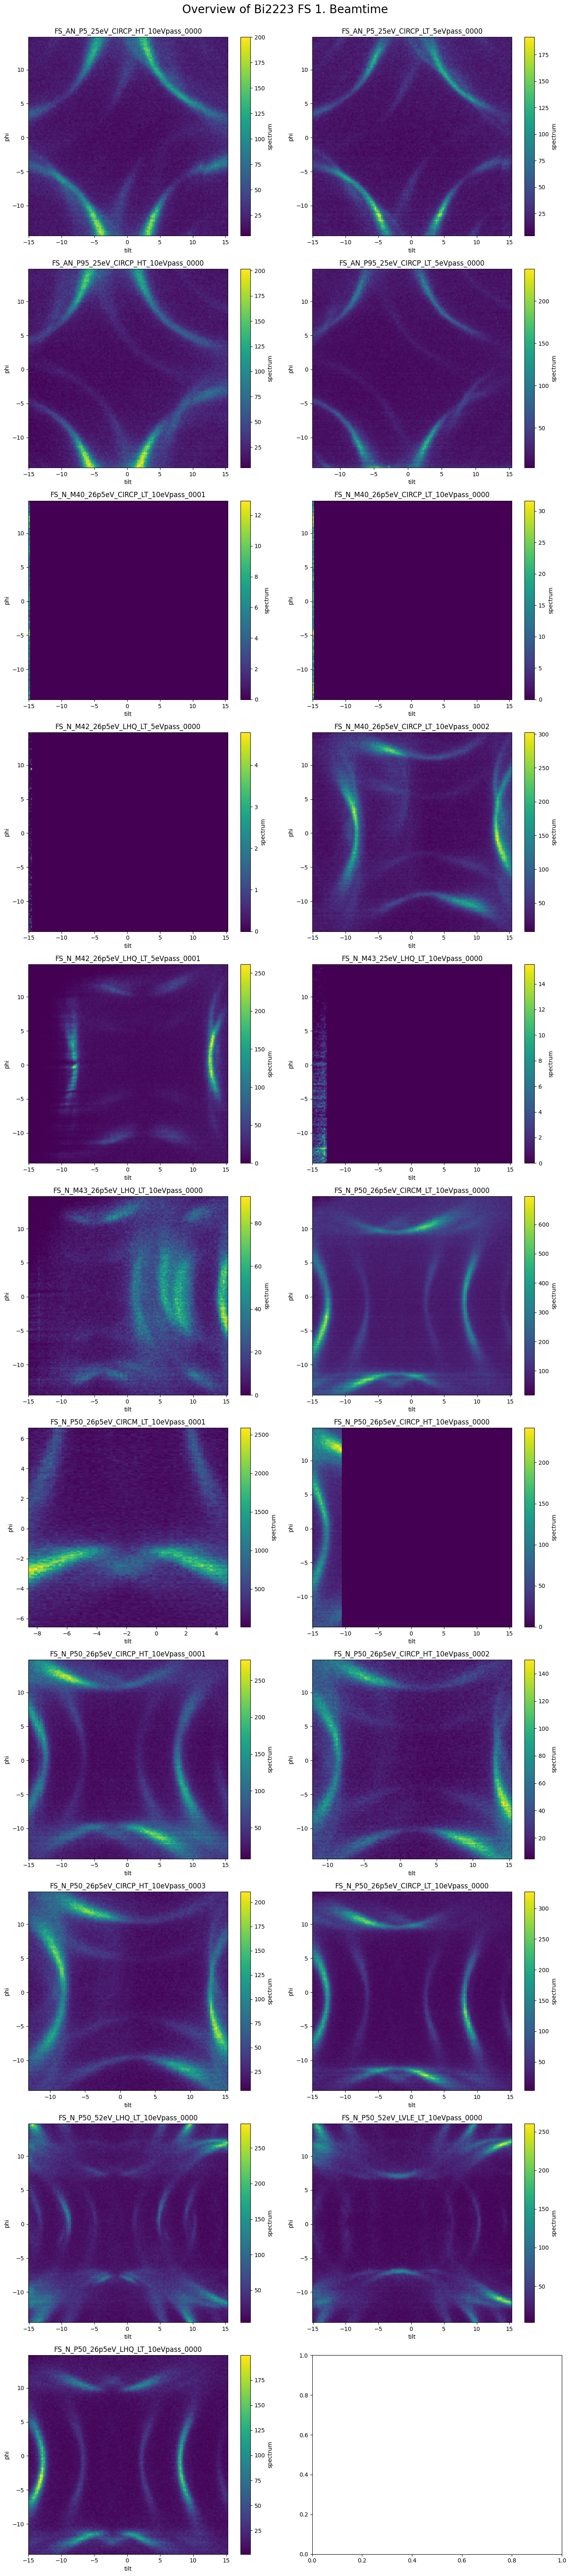

In [15]:
import matplotlib.pyplot as plt
import math
rows = math.ceil(len(data_list) / 2)
fig, ax = plt.subplots(rows, 2, figsize=(14, 6*rows))
fig.suptitle('Overview of Bi2223 FS 1. Beamtime', fontsize=20)
    
for key in data_list.keys():
    data = data_list[key].spectrum
    fs = data.sel(eV=slice(-0.02,0.02)).sum("eV")
    fs.plot(ax=ax.ravel()[list(data_list).index(key)])
    ax.ravel()[list(data_list).index(key)].set_title(f"{key}")
    
    # For plotting individual subplots
    #extent = ax.ravel()[list(data_list).index(key)].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    #plt.savefig(key, bbox_inches=extent.expanded(1.1, 1.2))

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

## Zoomed in FS maps with higher angular resolution

In [16]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Box_1_square_renamed")

# Different parameters used to set up scans at SLS
scan_type = 'FS'
direction = '*'
phi = '*'
energy = '*'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = 'zoom'
run = '*'.zfill(4)

# Put together string for finding file
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

full_file = os.path.join(path, file)
file

'FS_*_*_*_*_*_*eVpass_zoom_000*.h5'

In [17]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
files = glob.glob(full_file)
print(len(files))
files

4


['G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_N_P50_26p5eV_LHQ_LT_5eVpass_zoom_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_N_P50_26p5eV_CIRCM_LT_5eVpass_zoom_0001.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_N_P50_26p5eV_CIRCM_LT_5eVpass_zoom_0000.h5',
 'G:\\My Drive\\Bi2223\\e19557\\Box_1_square_renamed\\FS_N_P50_26p5eV_LHQ_LT_5eVpass_zoom_0001.h5']

In [18]:
data_list = {}
for file in files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    file_name = file.replace(path, '')[1:-3]
    data_list.update({file_name : data})

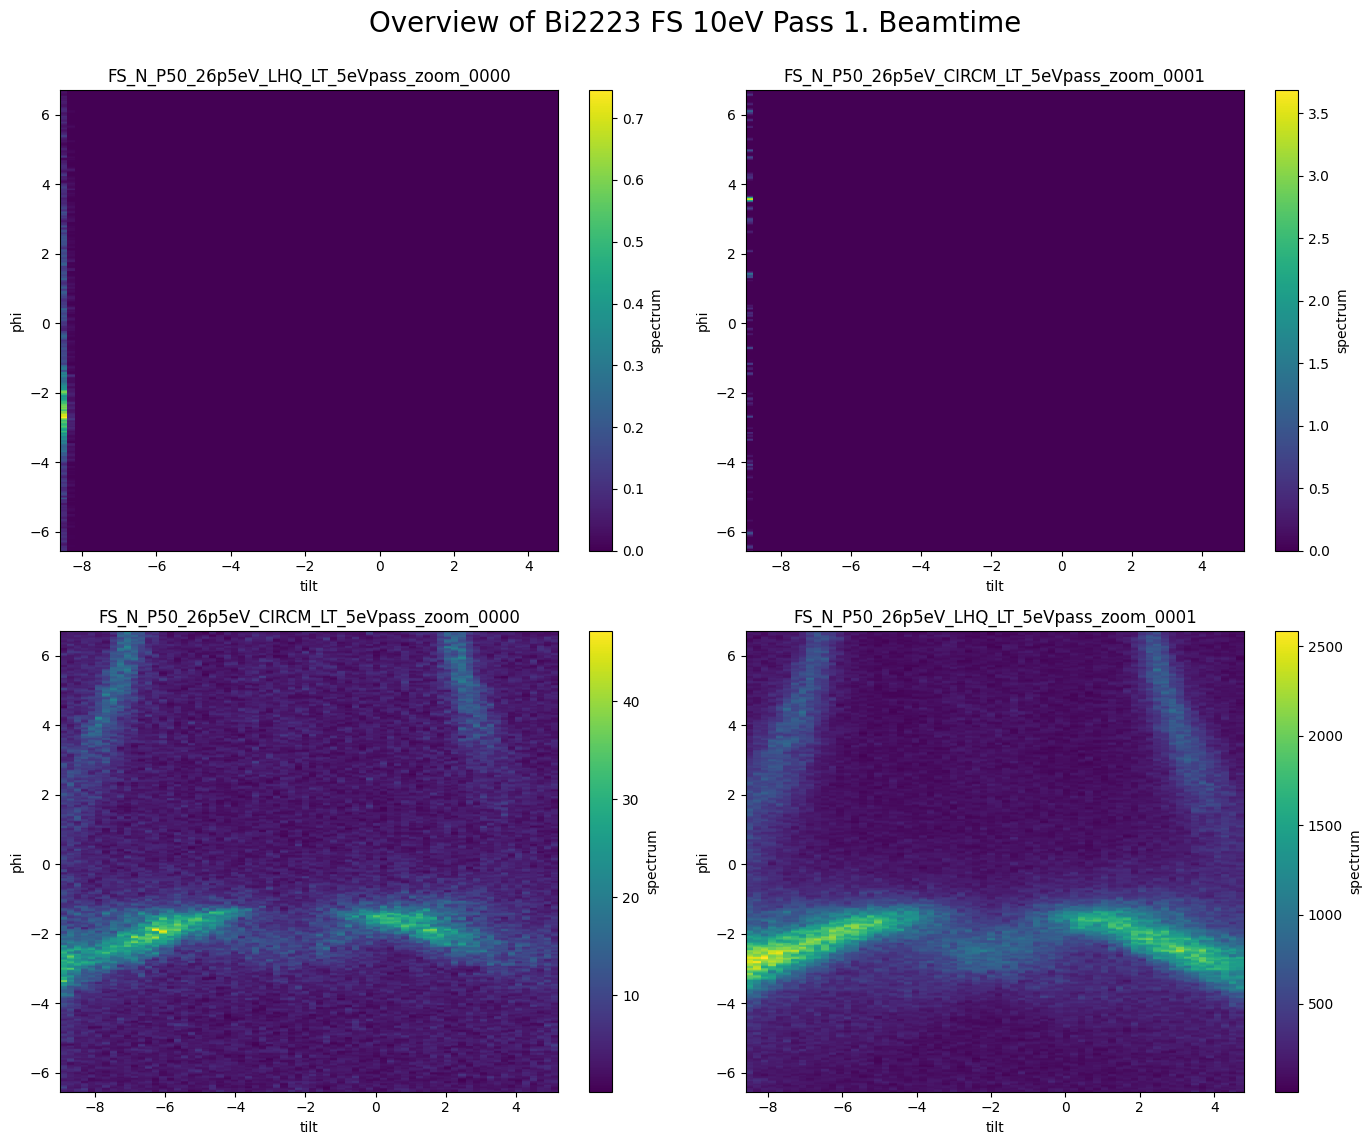

In [20]:
import matplotlib.pyplot as plt
import math
rows = math.ceil(len(data_list) / 2)
fig, ax = plt.subplots(rows, 2, figsize=(14, 6*rows))
fig.suptitle('Overview of Bi2223 FS 10eV Pass 1. Beamtime', fontsize=20)
    
for key in data_list.keys():
    data = data_list[key].spectrum
    fs = data.sel(eV=slice(-0.02,0.02)).sum("eV")
    fs.plot(ax=ax.ravel()[list(data_list).index(key)])
    ax.ravel()[list(data_list).index(key)].set_title(f"{key}")
    
    # For plotting individual subplots
    # extent = ax.ravel()[list(data_list).index(key)].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    # plt.savefig(key, bbox_inches=extent.expanded(1.1, 1.2))

plt.tight_layout(rect=[0, 0.03, 1, 0.98])